In [ ]:
%cd yolov5
%pip install -qr requirements.txt comet_ml

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [11]:
!python detect.py --weights yolov5s.pt --hide-labels --conf 0.4 --line-thickness 8 --source '/content/drive/MyDrive/Diana.png'

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/Diana.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=8, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/Diana.png: 640x640 1 person, 418.0ms
Speed: 3.2ms pre-process, 418.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


In [29]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
im = '/content/drive/MyDrive/Baby.png'

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


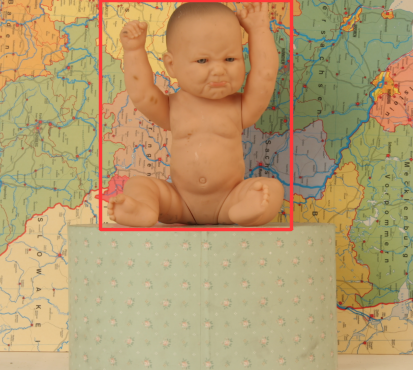

In [42]:
model.conf = 0.4
model.line_thickness = 60
results = model(im)
results.show(labels=False)

In [32]:
results.save(labels=False)

Saved 1 image to runs/detect/exp6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=2eec0fe3926024e31f685b79c972d0dba25657e04cc90b80c39d39a16dc6417c
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [3]:
pip install grad

  Preparing metadata (setup.py) ... done
  Created wheel for grad: filename=grad-0.0.1-py3-none-any.whl size=1104 sha256=a9408ed7df5ccd700a9292b1b793c47d37075aaf15df6f5c995aa4f956ff128b
  Stored in directory: /root/.cache/pip/wheels/ec/da/9c/d33d752b9765aa4e878ee7d55648265a0ba19bae52643a6fb3
Successfully built grad


In [4]:
pip install pytorch-gradcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5246 sha256=0786fd323a3b5ebb91a09e99379e9e388928422f43e6ac42314a70e779235705
  Stored in directory: /root/.cache/pip/wheels/6f/f1/8f/96c81d13f617841f23cae192a77fea3e9e988d058ba9414f2c
Successfully built pytorch-gradcam


In [5]:
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision.models import resnet50
from torchvision.models import densenet161
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [17]:
image = Image.open('/content/drive/MyDrive/Baby.png')
transform = transforms.ToTensor()
model = densenet161(pretrained=True)
target_layers = [model.features[-1]]
input_tensor =transform(image)
input_tensor = torch.unsqueeze(input_tensor,0)

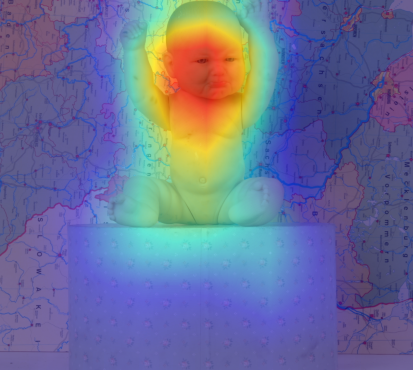

In [18]:
grad_cam = GradCAM(model=model, target_layers=target_layers)
grad_grayscale_cam = grad_cam(input_tensor=input_tensor)
grad_grayscale_cam = grad_grayscale_cam[0, :]
rgb_image = np.float32(image) / 255
visualization_1 = show_cam_on_image(rgb_image, grad_grayscale_cam, use_rgb=True)
img = (Image.fromarray(visualization_1))
# img
img

In [19]:
img.save('Baby_grad.png')